# FINANCIAL NEWS EDA

## OBJECTIVE

In [ ]:
The objective is to perform Exploratory Data Analysis and gather insights from the data, understand the correlation between
features and its impact.

EDA performed on the Financial News to find answers for the below questions

* Can the impact of a financial news be identified?
* Can we find the contribution of news article towards a positive, negative or neutral impact?
* Does a correlation exist between Crypto currency price and sentiment score?
* Can popularity of a News be measured, which is a depiction of the impact it created in the market.

## Package Initialization and Data Loading

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.dates  as mdates
import matplotlib.colors as colors

# Loading the aggregated Data from JSON files

financial_news_df = pd.read_json('raw_financial_news.json')
crypto_df = pd.read_json('processed_crypto.json')
stocks_df = pd.read_json('processed_stocks.json')

### Financial News Visualization, depicting its positive, negative and neutral distribution (Random 100 News from the past year)

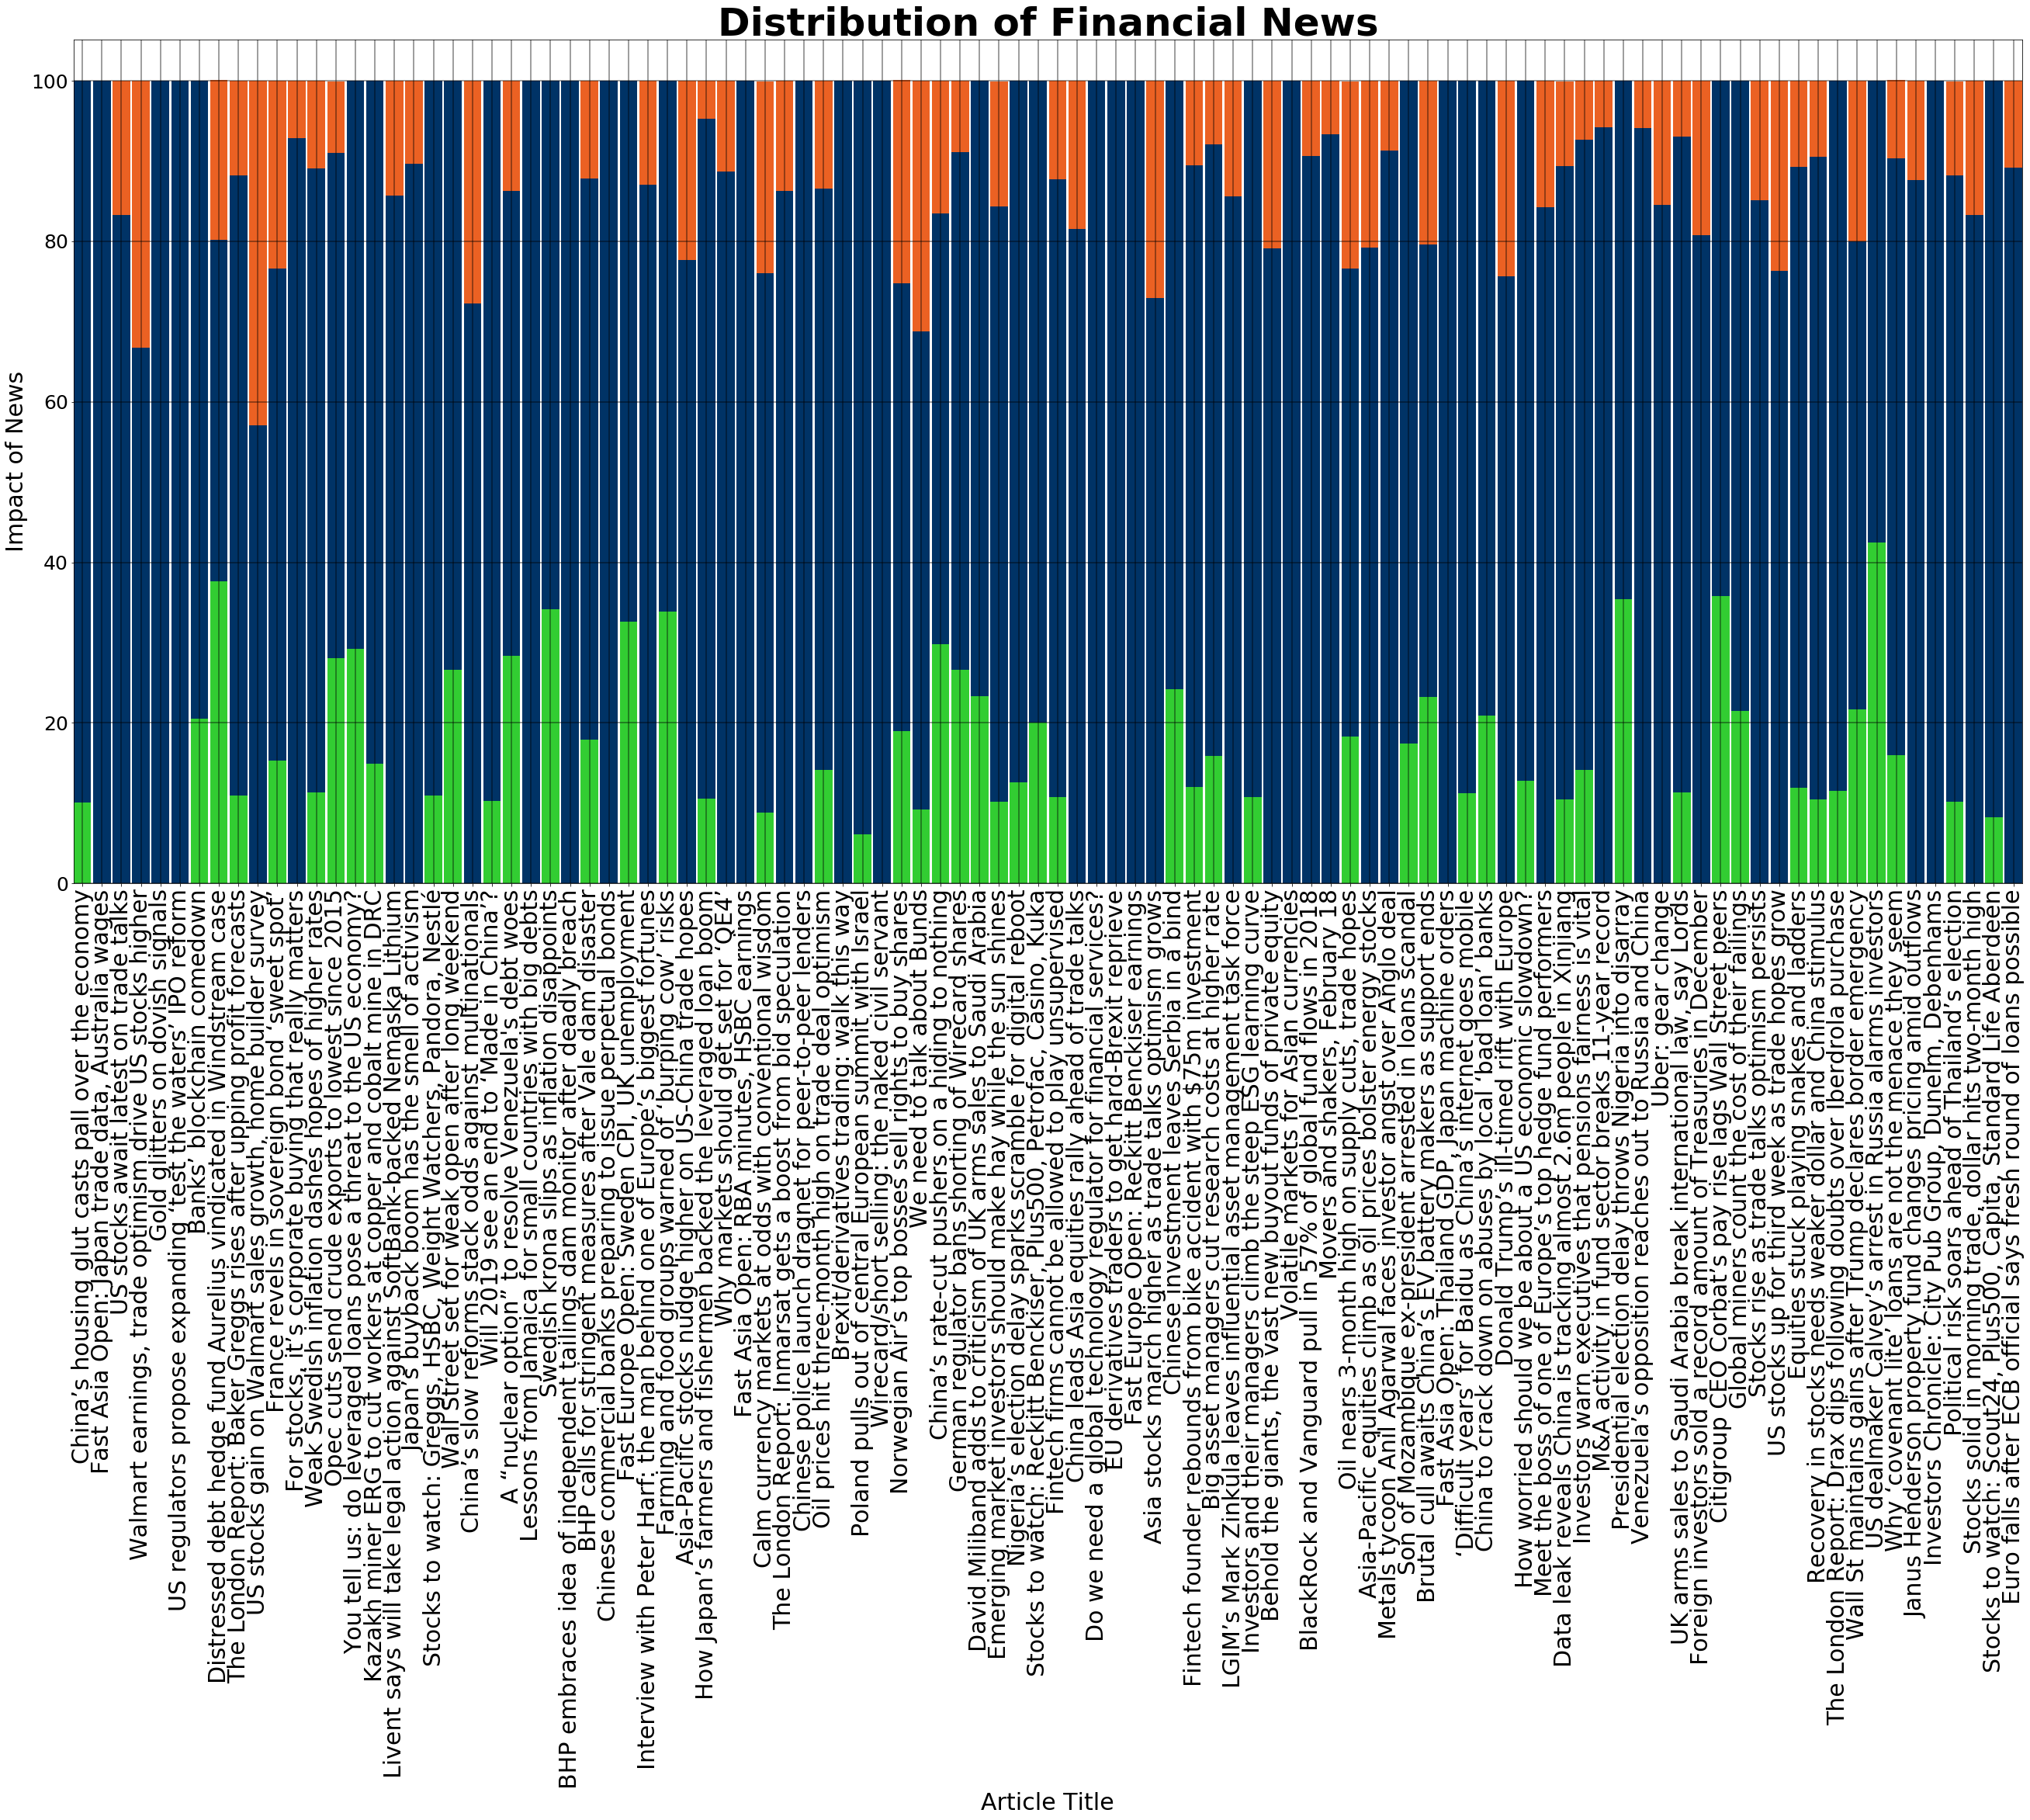

In [37]:
fin_news_group = financial_news_df
fin_news_group['pos_percentage'] = fin_news_group['pos']/1*100
fin_news_group['neg_percentage'] = fin_news_group['neg']/1*100
fin_news_group['neu_percentage'] = fin_news_group['neu']/1*100
fin_news_group = fin_news_group.head(100)
width = 0.9
plt.figure(figsize=(45,20))
plt.margins(x=0)
plt.grid(color='k', linestyle='-', linewidth=1.5, alpha=0.5)
p1 = plt.bar(fin_news_group.title, fin_news_group.neg_percentage, width, color='#32CD32')
p2 = plt.bar(fin_news_group.title, fin_news_group.neu_percentage, width, bottom=fin_news_group.neg_percentage, color='#003366')
p3 = plt.bar(fin_news_group.title, fin_news_group.pos_percentage, width, bottom=fin_news_group.neu_percentage+fin_news_group.neg_percentage, color='#EB6123')
plt.grid(color='k', linestyle='-', linewidth=1.5, alpha=0.5)
plt.xlabel('Article Title', size=30)
plt.ylabel('Impact of News',size=30)
plt.title('Distribution of Financial News', size=50, weight='bold')
plt.xticks(rotation = 90, size =30)
plt.yticks(size =25)
plt.show()

### News Data distribution based on their Impact

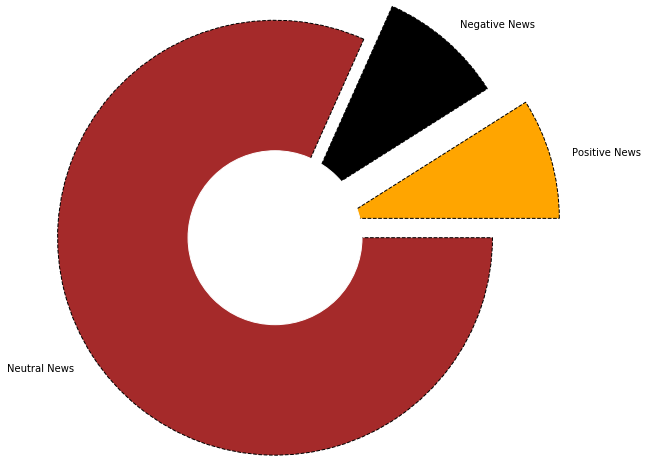

In [11]:
pos = financial_news_df['pos']/1*100
neg = financial_news_df['neg']/1*100
neu = financial_news_df['neu']/1*100
count = financial_news_df['pos'].count()
pos_news = np.sum(pos)/count
neg_news = np.sum(neg)/count
neu_news = np.sum(neu)/count
my_circle=plt.Circle((0,0), 1, color='white')
plt.pie([pos_news, neg_news, neu_news], labels = ('Positive News', 'Negative News', 'Neutral News'), radius = 2.5,\
       wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': 'dashed', 'antialiased': True}, colors = ['orange','black','brown'], explode=(0.8,0.5,0))
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

#### INFERENCE

* From the above graph it is evident that the news over the last year majorly had neutral reviews, which inturn had a neutral impact on the Market.
* It is also seen that a good amount of news has gained positive reviews and there has been an equal percentage of negative news over the year.

### Word Cloud Generated for Crypto Currency and Stocks News Data

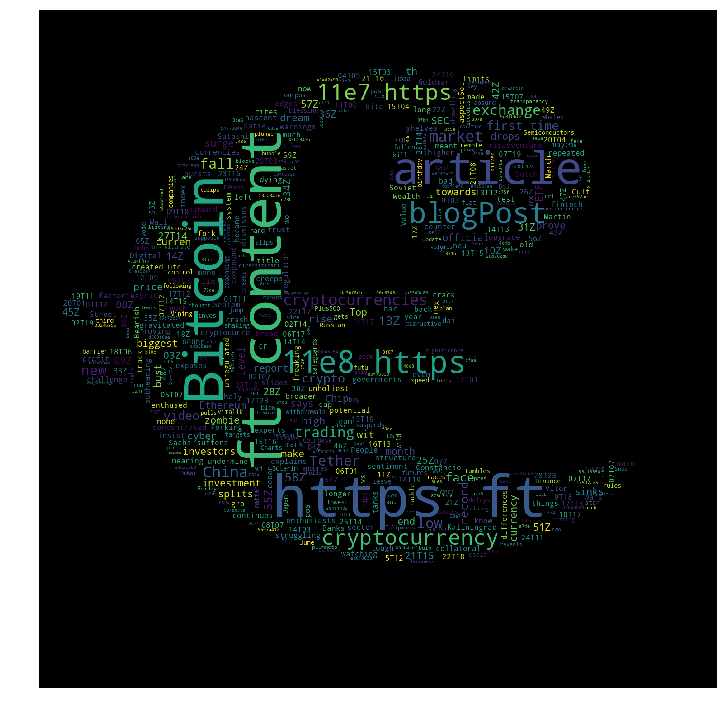

In [38]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout() 
    
crypto_info = ['Bitcoin','Ethereum','XRP','EOS', 'Litecoin', 'BTC', 'Tether', 'Stellar', 'TRON', 'Binance']
crypto = str(financial_news_df[financial_news_df['title'].str.contains('|'.join(crypto_info))])
crypto_mask = np.array(Image.open('crypto.jpg'))
plot_wordcloud(crypto, crypto_mask, max_words=8000, max_font_size=350, figure_size=(12,10))

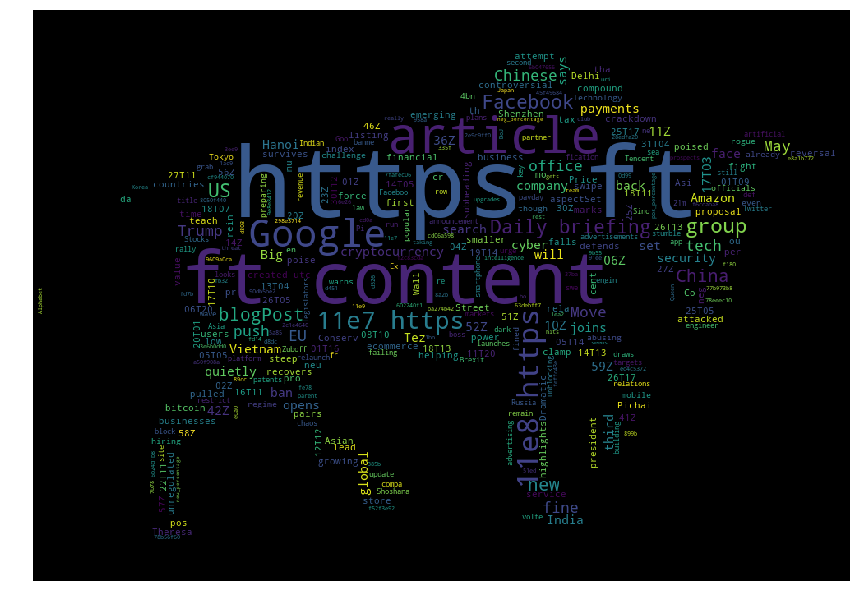

In [39]:
stock_info = ['Googl', 'MSFT', 'home depot', 'Wmt', 'WFC', 'citigroup', 'AAPL', 'cocacola', 'XOM', 'CVX', 'exxon', 'chevron']
stocks = str(financial_news_df[financial_news_df['title'].str.contains('|'.join(stock_info))])
stock_mask = np.array(Image.open('S2.jpg'))
plot_wordcloud(stocks, stock_mask, max_words=10000, max_font_size=310, figure_size=(12,10))

### Correlation between an Asset and it's Sentiment Score

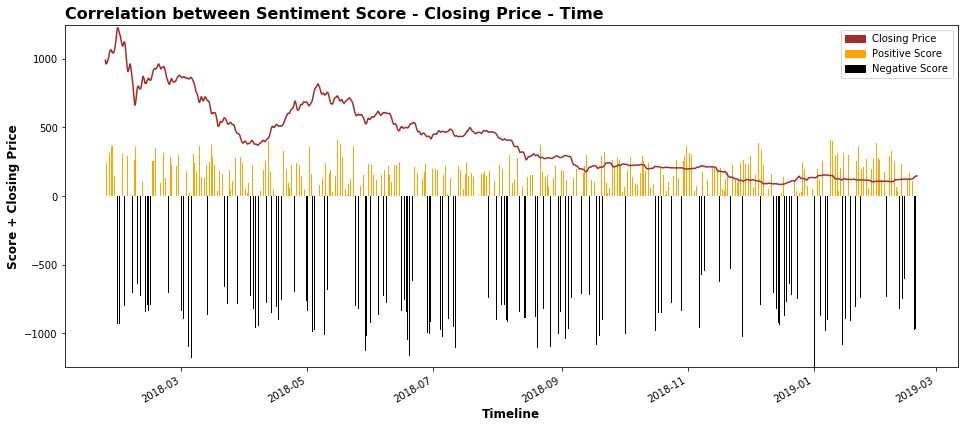

In [29]:
crypto_df['created_utc'] = pd.to_datetime(crypto_df['created_utc']).dt.tz_localize(None)
plot_1 = crypto_df[['asset_name','created_utc','fin_compound','fin_pos', 'fin_neg','close']].sort_values('created_utc')
plot_1 = plot_1[plot_1.asset_name == 'Ethereum']
dF = plot_1.set_index('created_utc')
dF1 = dF[dF['fin_compound']>=0]
dF2 = dF[dF['fin_compound']<0]
fig,axes = plt.subplots(figsize=(16,7))
axes.xaxis_date()
axes.plot(mdates.date2num(list(dF.index)),pd.Series.rolling(dF.close,24).mean(),color='brown')
axes.bar(mdates.date2num(list(dF1.index)),pd.Series.rolling(dF1.fin_compound*2000,24).mean(),align='center',width=0.02,color='orange')
axes.bar(mdates.date2num(list(dF2.index)),pd.Series.rolling(dF2.fin_compound*3000,24).mean(),align='center',width=0.02,color='black')
axes.set_title('Correlation between Sentiment Score - Closing Price - Time', fontweight="bold",loc='left',fontsize=16)
axes.set_xlabel('Timeline',fontweight="bold",fontsize=12)
axes.set_ylabel('Score + Closing Price',fontweight="bold",fontsize=12)

black_patch = mpatches.Patch(color='black', label='Negative Score')
orange_patch = mpatches.Patch(color='orange', label='Positive Score')
brown_patch = mpatches.Patch(color='brown', label='Closing Price')

plt.legend(handles=[brown_patch,orange_patch,black_patch])
axes.set_ylim(-1250,1250)
fig.autofmt_xdate()

#### INFERENCE

From the above graph it is evident that News data has had an impact on the market and a relationship exist between the sentiment
score and closing price of the asset.